---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. 

In order to better _visualize the decision boundaries,_ **we'll perform Principal Component Analysis (PCA)** on the data to _reduce the dimensionality_ to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/mushrooms.csv')

In [2]:
sns.set() #Update to set_theme() after updating seaborn: https://seaborn.pydata.org/whatsnew.html
sns.set_color_codes()

Source dataset `df` includes **21 features** with **8124 measurements** and a **binary "class" column**: either _p_ (poisonous) or _e_ (edible). This model will assume that we can use all or some of these features to train a model that can differentiate between the two given enough measurements are taken

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

`pd.get_dummies()` converts _categorical values into a binary matrix_. If you remember what this means, this will be enough of an explanation; if you don't, inspect the head of the two of them and you will see. **What will be its use?**

In [4]:
df2 = pd.get_dummies(df)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


`pd.DataFrame.sample()` is a very useful function that samples entries (rows) randomly from a dataframe, same number of columns. Useful to work explorations without using too much memory.

In [5]:
df3 = df2.sample(frac=0.08)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 5242 to 2607
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 80.6 KB


In [8]:
#Gets feature space X. Slices all rows (:) from column index 2 onward
X = df3.iloc[:,2:]
#Gets target space y. Slices all rows from column index 1 onward. I guess it could have chosen the first column 
#as well, it was just a matter of personal choice
y = df3.iloc[:,1]

`PCA().fit_transform()` Fits the model with X and applies the dimensionality reduction on X. Returns an 'X_new' object with the transformed values. **_It's kinda neat, inspect the thing for extra-punch_**. It is a single array of pairs of coordinates with the structure:   
`[[PC1(X0),PC2(Y0)],...,[PC1(Xn),PC2(Yn)]]`

In [9]:
pca = PCA(n_components=2).fit_transform(X)
#pca

In [10]:
#Just splits the pca that holds the X dimensionality reduced values and the y label target. No big deal there, 
#be mindful of the order in which it returns the split values, you could mess up there if you don't 
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

## And now... _It's plotting time_

We could just plot the components agains each other, just to get a feel of how sparse the data looks, how it clusters, but without adding the extra dimension of the target, it doesn't tell us much.

Text(0, 0.5, 'PC2')

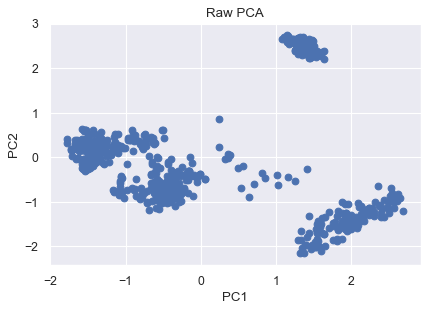

In [16]:
plt.figure(dpi=80)
plt.scatter(pca[:,0],pca[:,1])
plt.title('Raw PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

Now, if we plot the sets _separately_...

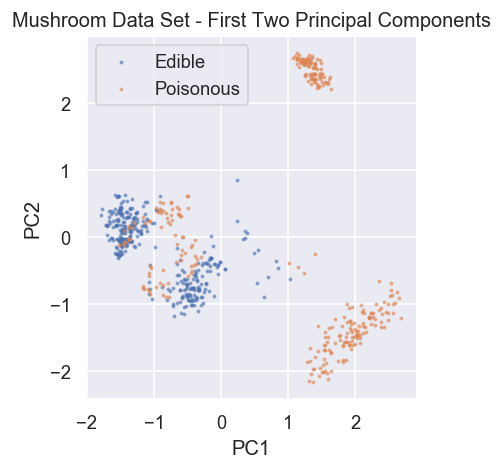

In [20]:
plt.figure(dpi=120)
#Scatter plot PC for only the Edible mushrooms
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
#Scatter plot PC for only the Poisonous mushrooms
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

Now we can see a lot of stuff, there seems to be about 5 groups, 2 poisonous groups that are very clearly separated from the 2 edible ones and another poisonous that seems to be overlapping them. With our _human eye we can see this,_ but _as is,_ **there is no way the computer can tell them apart**, we need to use an algorithm to build a model that can draw decision boundaries in order to achieve such a feat. 

In [32]:
#Enumerate does this weird thing where it creates an 'enumerate' object that works kind of like an array
#But it is not an array object. It is more like a list of lists. In this case, it is useful for creating a cycle
#that iterates across a given array using a numerical index to move along the axis of 'something' else, maybe
#even to move along the cycle itself
for i,plot_type in enumerate(['Decision Boundary','Decision Probabilities']):
    print(i,plot_type)

0 Decision Boundary
1 Decision Probabilities


In [33]:
#I hadn't arrived at this point in here! Progress! Feels good ain't it? Hadn't noticed
def plot_mushroom_boundary(X, y, fitted_model):

    #Instantiate figure space at a decent resolution and size
    plt.figure(figsize=(9.8,5), dpi=100)
    #Explanation in the cell above
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        #Creates and select the space to plot in a 1x2 subplots object, that' why the i+1 index
        plt.subplot(1,2,i+1)
        
        #The stuff next here, seems way out of the level of math I can currently handle but it seems it works
        #to represent the fitted models on the following cells, I should just 'trust' the code for now, and
        #reuse it later if I can with some cautiousness.
        
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        
        #Plots the PCA dispersed values
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        #Plots the decision boundaries calculated by the complicated math above
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        #Just titles them plots
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

## Logistic Regression

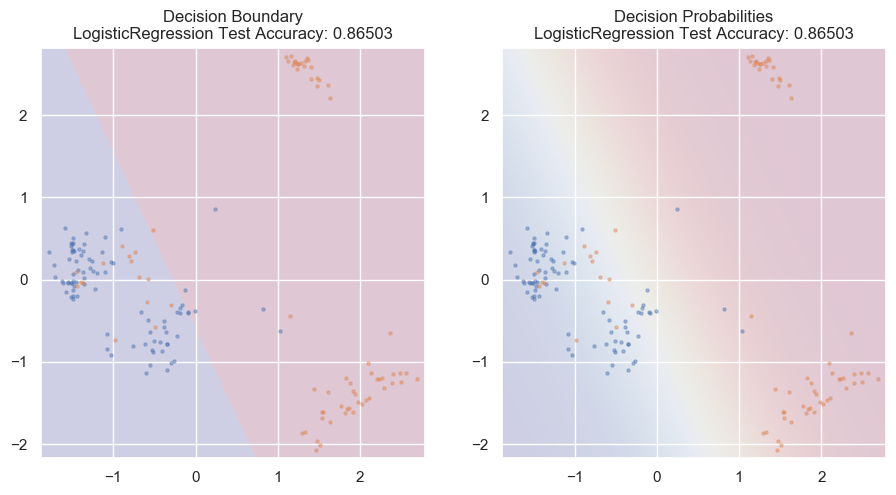

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## K-Neighbors Classifier

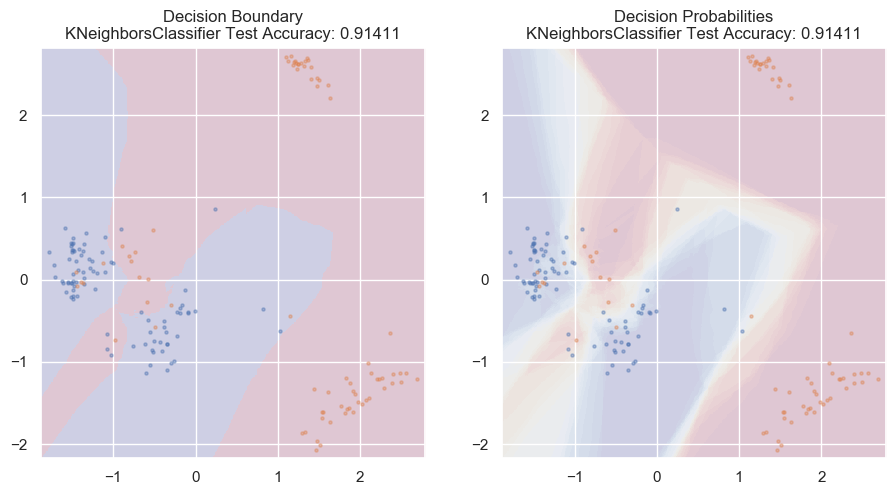

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Decision Tree Classifier - max depth = 3

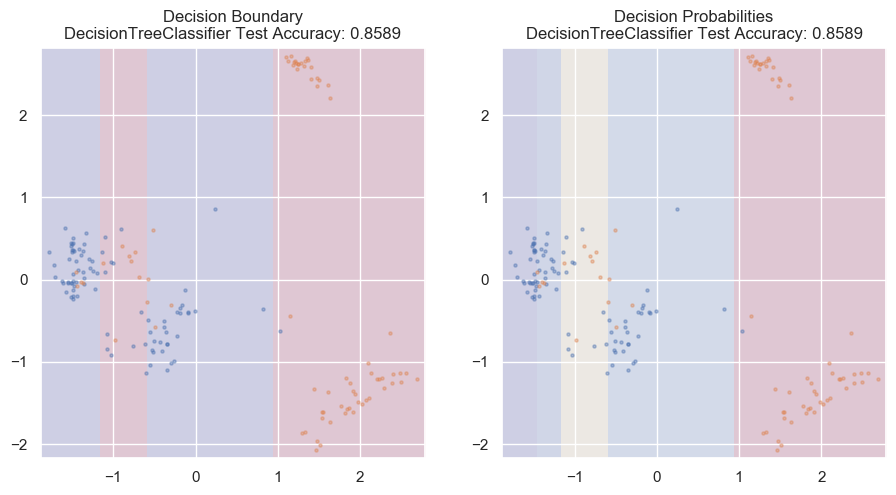

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Decision Tree Classifier - default parameters

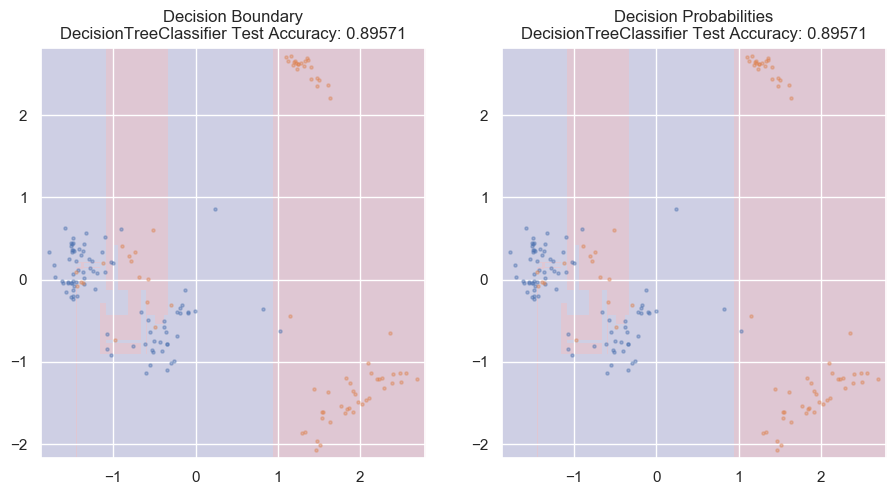

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Random Forest Classifier

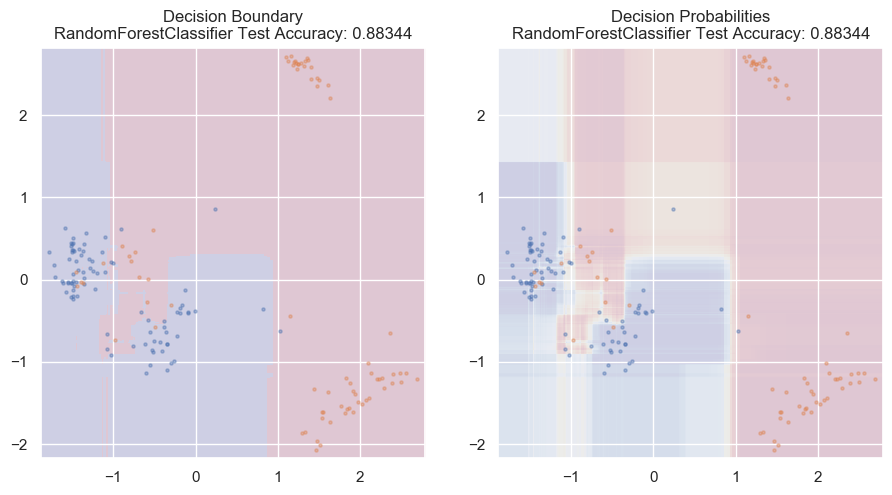

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Support Vector Machines - Linear Regression Kernel

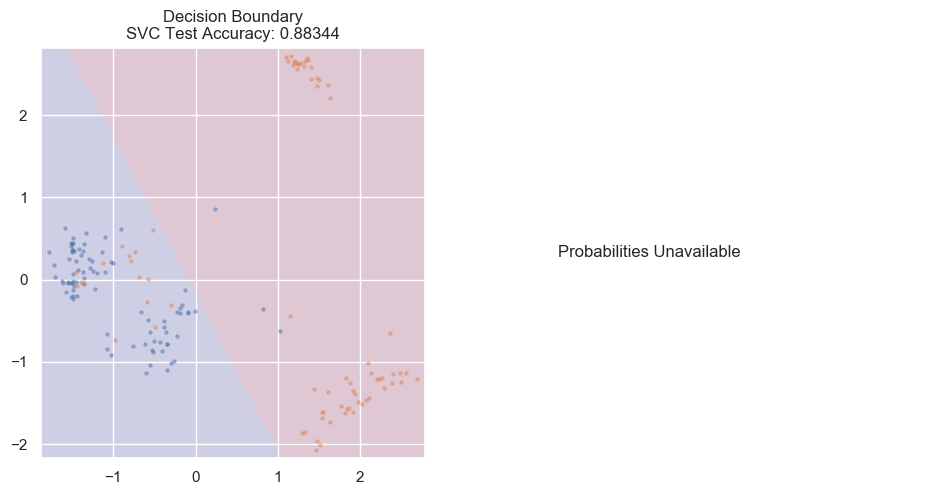

In [39]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Support Vector Machines - Radial Transformation Kernel C = 1

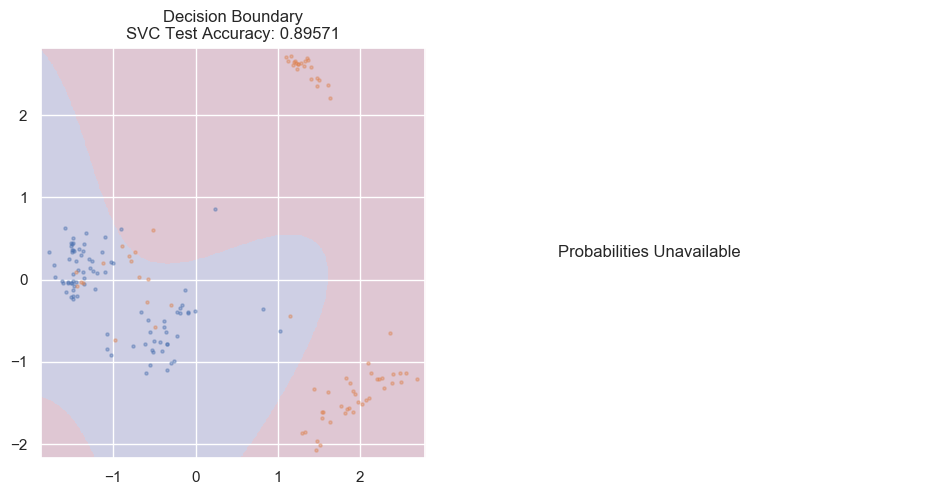

In [40]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Support Vector Machines - Radial Transformation C = 10

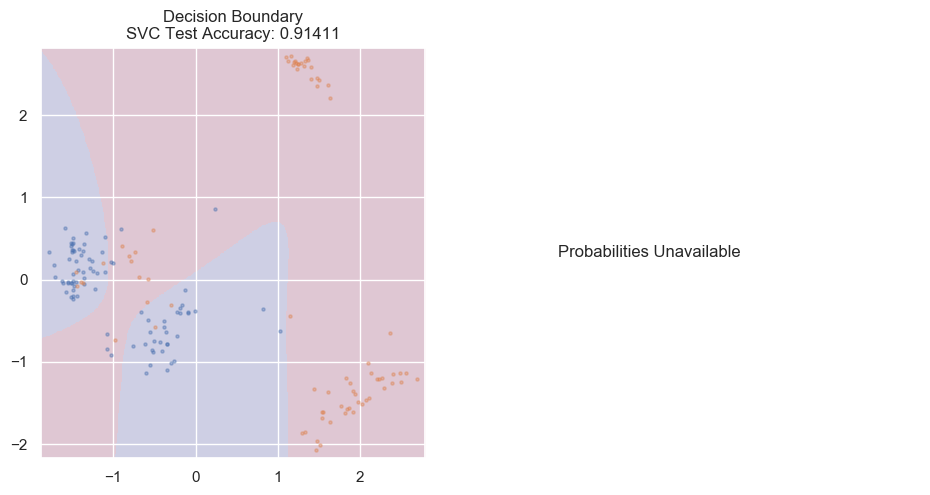

In [41]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## Naive Bayes 

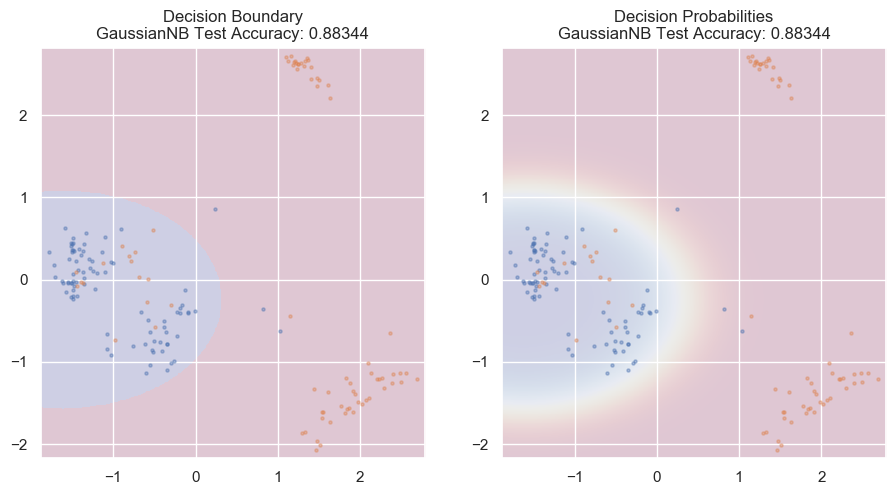

In [42]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

## MLP Classifier

/home/khaerus/anaconda3/envs/DataPy/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


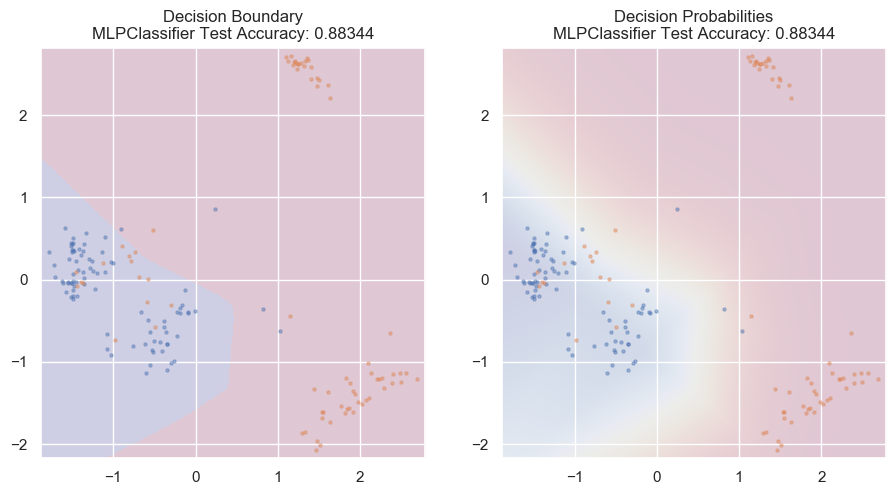

In [43]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

What a useful notebook! There really is no point in dwelling further into each of them before I read upon them but it will be better if I do it as I go. For now, I kinda get how they drew each of them boundaries and what are the downsides of each.